In [60]:
#Importacion de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.colab import drive

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive")

/content


#Introduccion

La motocicleta es un vehiculo economico y versatil. Aunque fue inventada por un Estadounidense, Sylvester Howard Roper en el año 1867, es el vehiculo por excelencia de las economias emergentes que no cuentan con sistemas de transporte masivos eficientes.

Latinoamerica por ejemplo, es una region donde este medio de transporte es muy popular. En el año 2022, con la informacion disponible se estima que se vendieron  más de 5 millones de motocicletas, desde Mexico hasta Argentina.

Dentro de este mercado resaltan los resultados de Colombia, un pais con 48 millones de habitantes, que en el 2022 registró 800 mil motos nuevas. Segun el Dane (departamento nacional de estadistica colombiano), el 70% de la poblacion está en la edad para conducir, por lo que se puede calcular que 1 entre 40 personas con edad para manejar en Colombia, compró una moto nueva en el 2022.

Por estos volumenes de venta, este mercado es interesante para los inversionistas de la industria automotriz.

El objetivo de este proyecto consiste en apoyar inversionistas del sector a tomar decisiones estrategicas de producto y precio, que permitan ganar participacion en el mercado Colombiano de motos.

# Objetivo

Con la informacion disponible se busca crear y evaluar un modelo de regresión, que permita predecir los precios publico de las motos, con base en precios de exportación y otras variables de interés.

# Decripcion del Dataset

El dataset que se va a utilizar para este proyecto, incluye informacion de volumenes de ventas, exportaciones, marca y precios por producto, mes a mes.

Para este proyecto se construyo este dataset, combinando varias fuentes de datos en una sola.

Las variables disponibles son:


**CC:** cilindraje de cada modelo que indica el volumen en centímetros cúbicos de los cilindros del motor. Este indicador se utiliza como referencia para clasificar el tamaño de las motocicletas, entre pequeñas y grandes.

**Retail**: las ventas publico x modelo, corresponde a las matrículas de placas de motos realizadas, de cada modelo para un mes en específico.

**FOB**: precio de exportación, solo tenemos disponible precios de marcas indias y algunas japonesas que se producen en India.

**RSP**: precios para el cliente final sin costos de registro ni seguros, también conocido como retail selling price.

**exports**: volumenes de exportación desde India de cada modelo mes a mes.

**TRM**: Tasa representativa de cambio, USD a COP, registrada el último día de cada mes.

**Interest rate:** tasa de prestamo minima en el pais, tambien conocida como el IBR, cada mes.

**OEM:** Pais de origen del productor de la moto.

**Segment:** Segmento al que pertenece la moto, clasificacion interna asignada por el equipo de desarrollo de producto, y el equipo comercial.

**Brand:** Marca comercial de la motocicleta

**New Model:** Nombre comercial de la motocicleta

# Importar dataset

In [3]:
#Importacion del conjunto de datos
ds = pd.read_excel("Motorcycle data base.xlsx")

In [4]:
ds.head()

New Model  Model code  Retail  Exports       Date  Year  Month  \
0  1290 SUPER ADVENTURE         287       4      0.0 2023-07-01  2023      7   
1                 180 S        6598      76      0.0 2023-07-01  2023      7   
2         250 ADVENTURE        3586       3      0.0 2023-07-01  2023      7   
3               300 EXC        3519       2      0.0 2023-07-01  2023      7   
4                 302 S        3183       2      0.0 2023-07-01  2023      7   

  Month name       RSP  FOB      TRM  Interest rate         Segment  \
0       July        -1 -1.0  3923.49         0.1325   Upper Premium   
1       July  13649000 -1.0  3923.49         0.1325    Core Premium   
2       July        -1 -1.0  3923.49         0.1325  On/Off Premium   
3       July        -1 -1.0  3923.49         0.1325  On/Off Premium   
4       July        -1 -1.0  3923.49         0.1325   Upper Premium   

   Segment code    CC    Brand  Brand code     OEM  OEM code  
0            15  1290      KTM         307  OTHERS         4  
1             6   175  BENELLI          49  OTHERS         4  
2            11   249      KTM         307  OTHERS         4  
3            11   300      KTM         307  OTHERS         4  
4            15   300  BENELLI          49  OTHERS         4

In [5]:
#Revision de los datos
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   New Model      13288 non-null  object        
 1   Model code     13288 non-null  int64         
 2   Retail         13288 non-null  int64         
 3   Exports        13288 non-null  float64       
 4   Date           13288 non-null  datetime64[ns]
 5   Year           13288 non-null  int64         
 6   Month          13288 non-null  int64         
 7   Month name     13288 non-null  object        
 8   RSP            13288 non-null  int64         
 9   FOB            13288 non-null  float64       
 10  TRM            13288 non-null  float64       
 11  Interest rate  13288 non-null  float64       
 12  Segment        13288 non-null  object        
 13  Segment code   13288 non-null  int64         
 14  CC             13288 non-null  int64         
 15  Brand          1328

In [6]:
ds.shape

(13288, 19)

El dataset original cuenta con 13mil registros y 19 columnas. De entrada se sabe que algunas columnas como la marca y el modelo, están duplicadas, con una columna de texto y otro código correspondiente a cada variable categórica.

Para este ejercicio se tendrán en cuenta las variables codificadas, y en el caso de OEM se realizará un encoding para separar los orígenes de los fabricantes en columnas.

# Encoding

A continuación vamos a incluir columnas adicionales que permitan identificar el origen del fabricante usando 1 y 0, en lugar de codigos que van de 1 a 4.

Debemos realizar una limpieza en el dataset para poder graficar histogramas. A Continuacion se procede a remover los campos de texto que nos permita tener un dataset numerico.

In [7]:
dsn = ds.drop(columns = {'New Model','Brand','Month name','Segment'})

In [8]:
#Hacemos dummies las variables!
dsn=pd.get_dummies(dsn, drop_first=False)

In [9]:
dsn.head()

Model code  Retail  Exports       Date  Year  Month       RSP  FOB  \
0         287       4      0.0 2023-07-01  2023      7        -1 -1.0   
1        6598      76      0.0 2023-07-01  2023      7  13649000 -1.0   
2        3586       3      0.0 2023-07-01  2023      7        -1 -1.0   
3        3519       2      0.0 2023-07-01  2023      7        -1 -1.0   
4        3183       2      0.0 2023-07-01  2023      7        -1 -1.0   

       TRM  Interest rate  Segment code    CC  Brand code  OEM code  \
0  3923.49         0.1325            15  1290         307         4   
1  3923.49         0.1325             6   175          49         4   
2  3923.49         0.1325            11   249         307         4   
3  3923.49         0.1325            11   300         307         4   
4  3923.49         0.1325            15   300          49         4   

   OEM_CHINA  OEM_INDIA  OEM_JAPAN  OEM_OTHERS  
0          0          0          0           1  
1          0          0          0           1  
2          0          0          0           1  
3          0          0          0           1  
4          0          0          0           1

Con el dataset organizado, podemos proceder al analisis

# Analisis de datos

Con los datos limpios y ordenados procedemos a realizar algunos graficos que nos permitan entender mejor el comportamiento de los mismos.

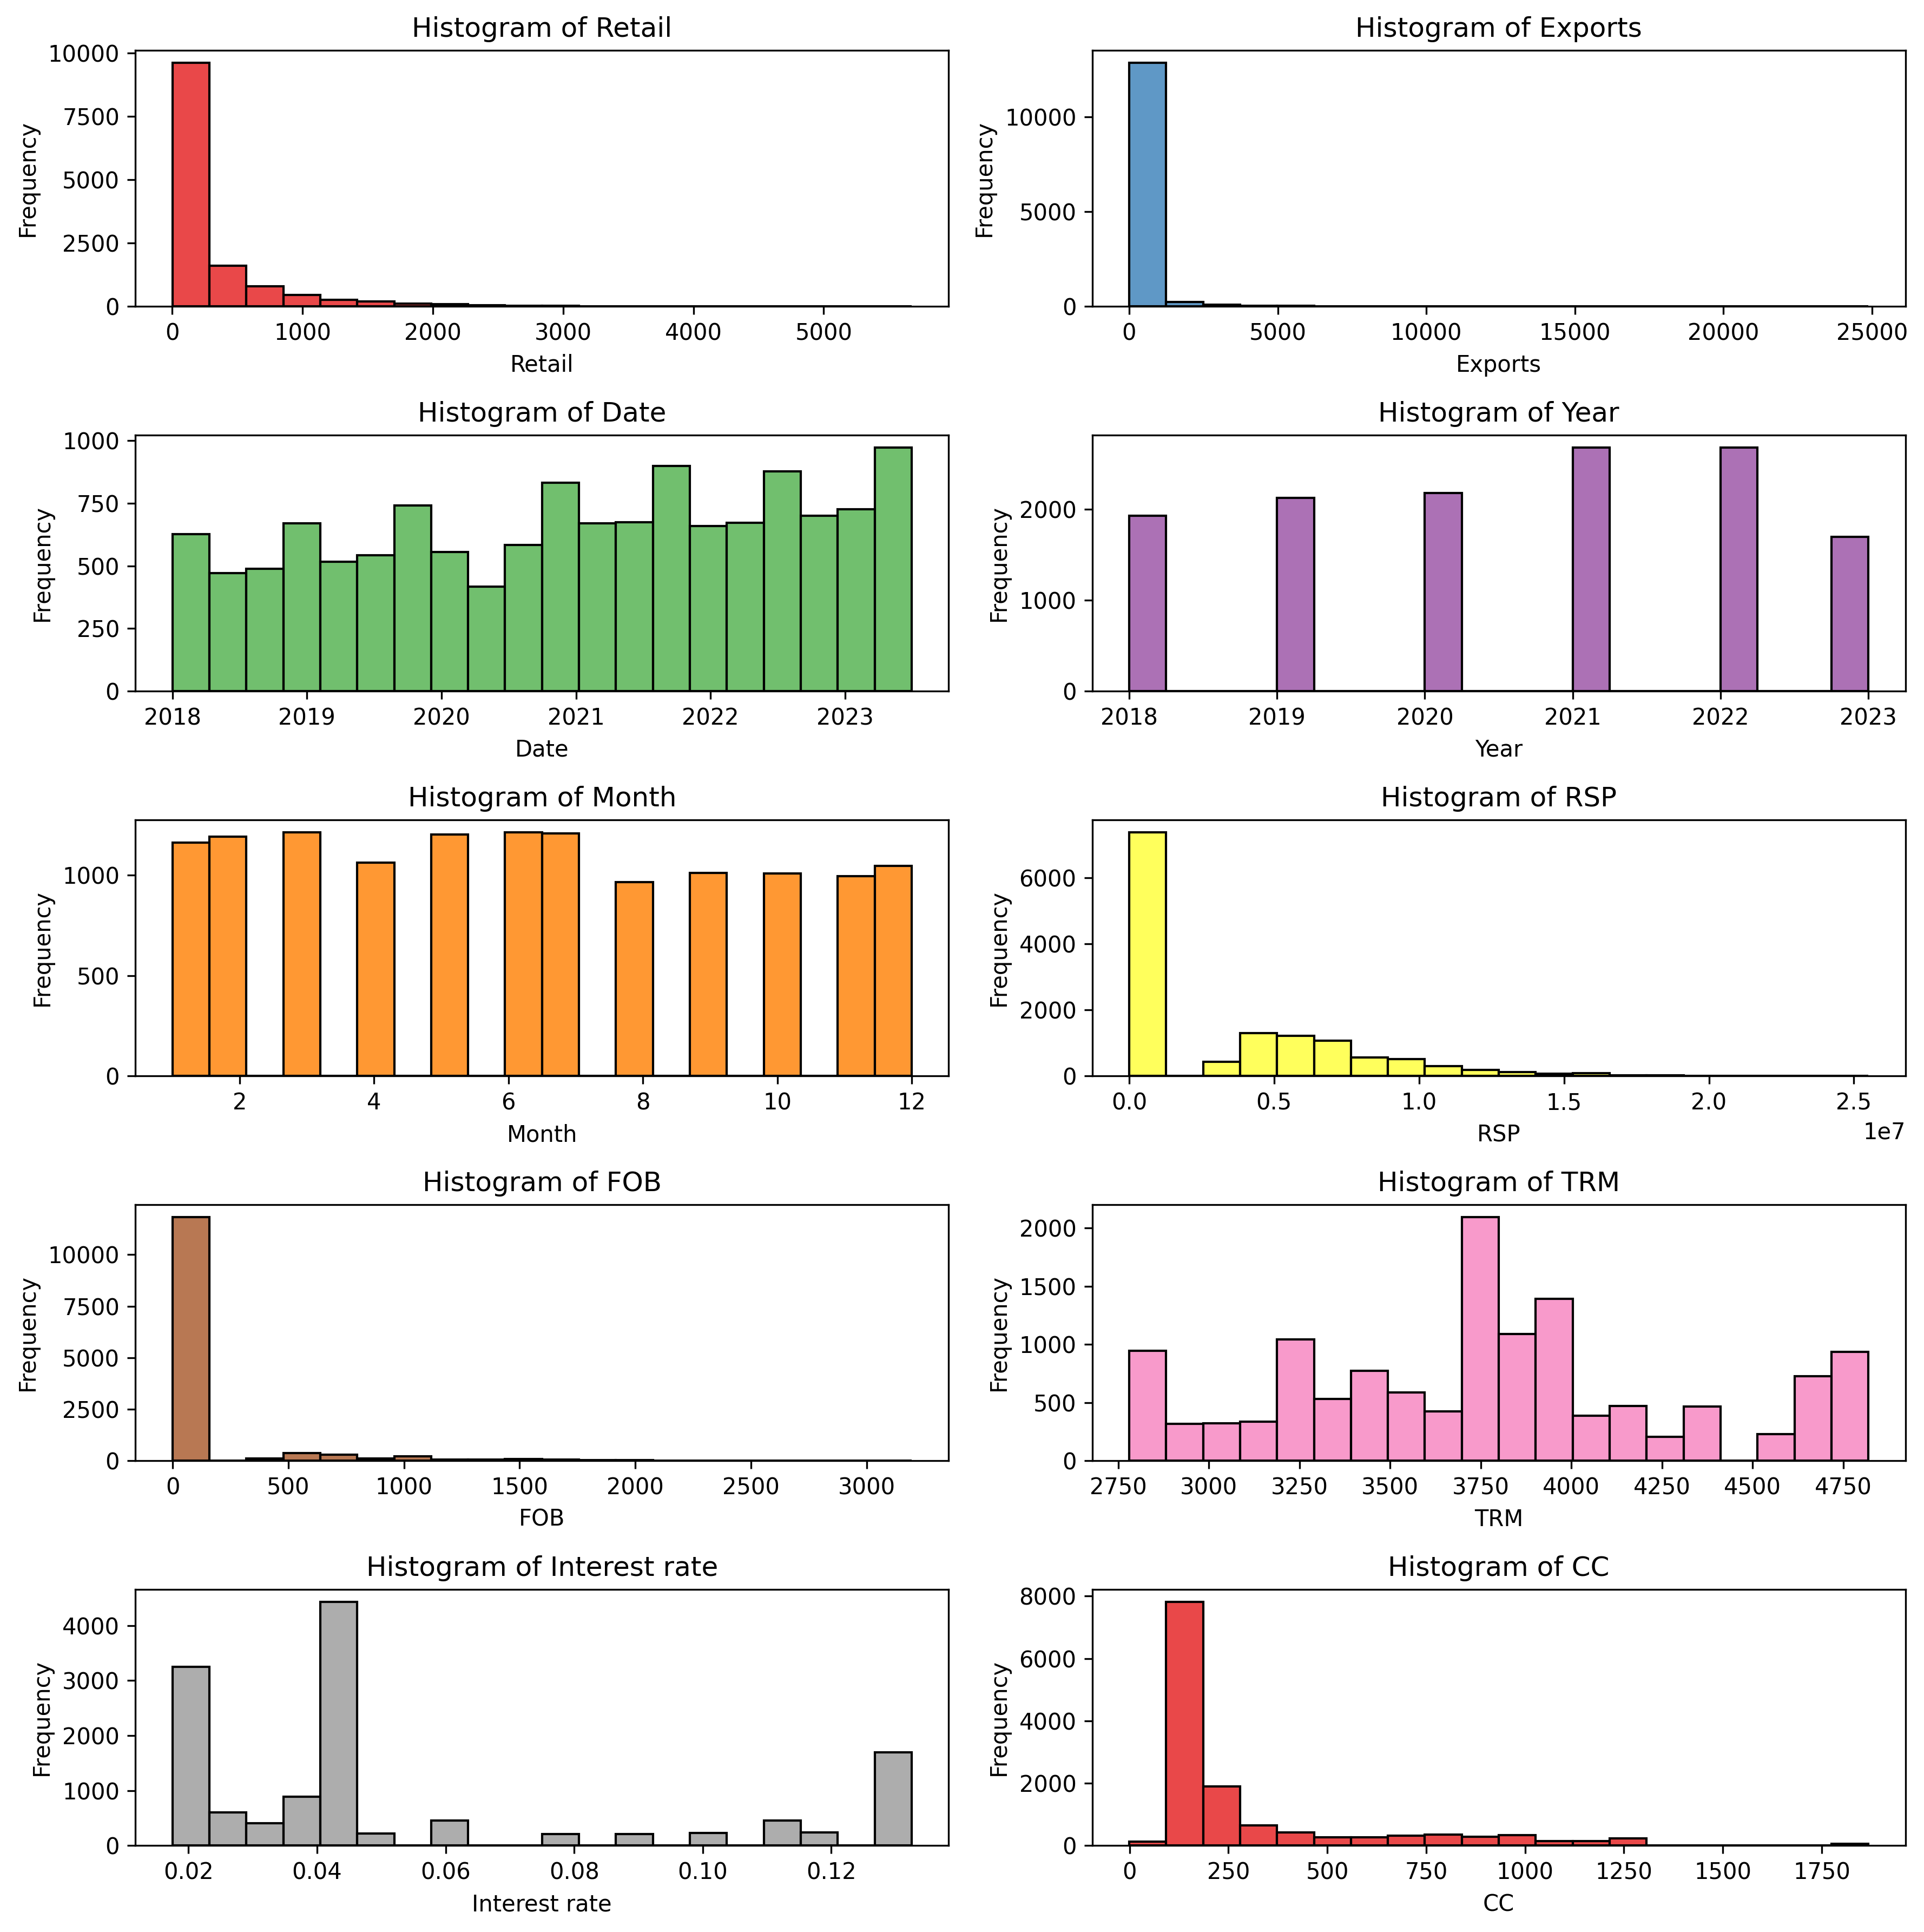

In [10]:
columns_to_exclude = {'OEM code','Brand code','Model code','Segment code','OEM_CHINA','OEM_INDIA','OEM_JAPAN','OEM_OTHERS'}

all_columns = dsn.columns

columns = all_columns.drop(columns_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 12), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.histplot(data=dsn[column], ax=axes[row, col], color=colors[i], alpha=0.8, bins=20)
    axes[row, col].set_ylabel('Frequency', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Histogram of {column}', color=title_color)

    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

En esta revision se observan datos atipicos en algunas columnas.


Al analizar los datos de Retail por ejemplo, se observa una gran concentracion de sus datos entre 0 y 500. Recordemos que la base de datos indica los valores por modelo mes a mes, esto se puede interpretar como que, una gran parte de modelos de motos no tienen ventas mayores a 500 motos/mes.  


En cuanto a las exportaciones, se observa que la mayoria de los datos esta cerca al 0, para sacar conclusiones es necesario profundizar más en este campo.


'RSP' y 'FOB' tienen muchos valores ente -1 y 0, lo cual no refleja un valor acorde a los precios. La razon de esto, es que en la base de datos original, se reemplazaron valores faltantes o nulos, por un -1. Para estudiar con mas profundidad las variables de precio, estos datos se deben filtrar.


La columna 'cilindraje' presenta la mayor parte de datos de 0 a 200 porque el mercado de motos que mas registros tiene está dentro de ese rango, es normal que la mayoría de datos estén ahí.


Para obtener un dataset más preciso se realizara un filtro para el campos de RSP, en donde solo tendremos en cuenta los modelos que tienen precios público diferentes a 0 y -1.

In [11]:
dsnr = dsn[(dsn['RSP'] > 0)]

In [12]:
dsnr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5894 entries, 1 to 13285
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     5894 non-null   int64         
 1   Retail         5894 non-null   int64         
 2   Exports        5894 non-null   float64       
 3   Date           5894 non-null   datetime64[ns]
 4   Year           5894 non-null   int64         
 5   Month          5894 non-null   int64         
 6   RSP            5894 non-null   int64         
 7   FOB            5894 non-null   float64       
 8   TRM            5894 non-null   float64       
 9   Interest rate  5894 non-null   float64       
 10  Segment code   5894 non-null   int64         
 11  CC             5894 non-null   int64         
 12  Brand code     5894 non-null   int64         
 13  OEM code       5894 non-null   int64         
 14  OEM_CHINA      5894 non-null   uint8         
 15  OEM_INDIA      5894 

Este paso hizo que el total de filas pasarna de 13 mil a 5.900, una reduccion en los datos cercana al 50%. La primera recomendacion para los inversionistas, es que deberían ampliar la base de motos con seguimiento en precio, esto para mejorar los resultados del modelo al tener más información disponible.

En el siguiente gráfico se presenta la distribución de los datos con este ajuste en el precio

<Axes: xlabel='RSP', ylabel='Count'>

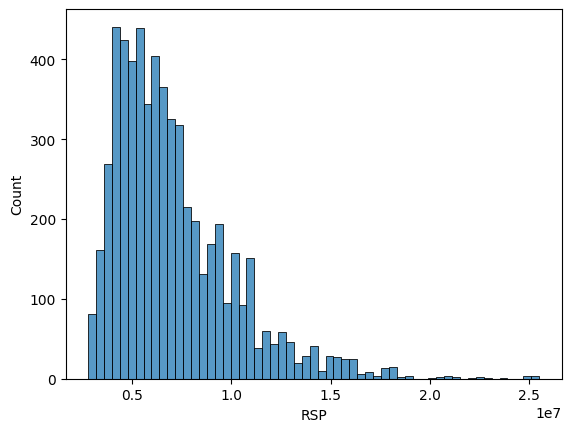

In [13]:
sns.histplot(data=dsnr, x='RSP')

<Axes: xlabel='RSP'>

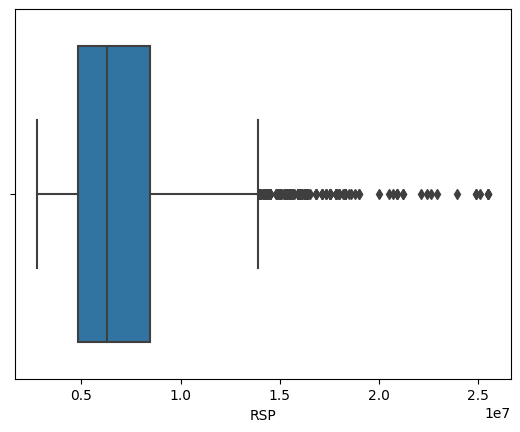

In [14]:
sns.boxplot(data=dsnr, x='RSP')

A pesar de que la distribucion de la variable RSP mejoró considerablemente frente al primer gráfico, que incluía precios en 0 y -1, aún se encuentran muchos datos atípicos por encima del bigote superior en el boxplot.

 Para mejorar la homogeneidad de los datos, se realizara nuevamente un filtro, esta vez con un limite superior e inferior más ajustados.

In [16]:
dsnr = dsn[(dsn['RSP'] > 4000000) & (dsn['RSP'] < 14000000)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5041 entries, 1 to 13284
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     5041 non-null   int64         
 1   Retail         5041 non-null   int64         
 2   Exports        5041 non-null   float64       
 3   Date           5041 non-null   datetime64[ns]
 4   Year           5041 non-null   int64         
 5   Month          5041 non-null   int64         
 6   RSP            5041 non-null   int64         
 7   FOB            5041 non-null   float64       
 8   TRM            5041 non-null   float64       
 9   Interest rate  5041 non-null   float64       
 10  Segment code   5041 non-null   int64         
 11  CC             5041 non-null   int64         
 12  Brand code     5041 non-null   int64         
 13  OEM code       5041 non-null   int64         
 14  OEM_CHINA      5041 non-null   uint8         
 15  OEM_INDIA      5041 

<Axes: xlabel='RSP', ylabel='Count'>

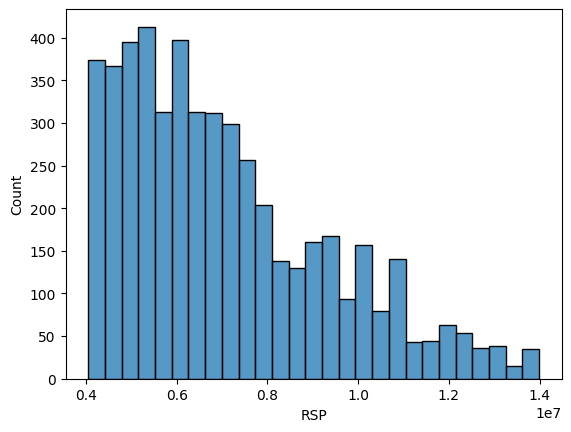

In [17]:
dsnr.info()
sns.histplot(data=dsnr, x='RSP')

<Axes: xlabel='RSP'>

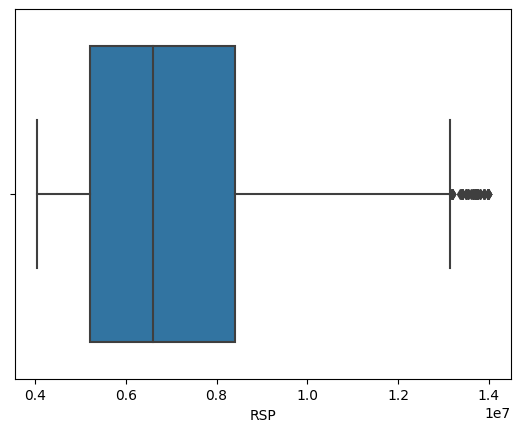

In [18]:
sns.boxplot(data=dsnr, x='RSP')

Aun se observan datos atípicos por encima de los 13 millones de pesos, por lo que se probará nuevamente con un rango hasta 12.5 millones

In [78]:
dsnr = dsn[(dsn['RSP'] > 4000000) & (dsn['RSP'] < 12500000)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 12 to 13284
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     4906 non-null   int64         
 1   Retail         4906 non-null   int64         
 2   Exports        4906 non-null   float64       
 3   Date           4906 non-null   datetime64[ns]
 4   Year           4906 non-null   int64         
 5   Month          4906 non-null   int64         
 6   RSP            4906 non-null   int64         
 7   FOB            4906 non-null   float64       
 8   TRM            4906 non-null   float64       
 9   Interest rate  4906 non-null   float64       
 10  Segment code   4906 non-null   int64         
 11  CC             4906 non-null   int64         
 12  Brand code     4906 non-null   int64         
 13  OEM code       4906 non-null   int64         
 14  OEM_CHINA      4906 non-null   uint8         
 15  OEM_INDIA      4906

<Axes: xlabel='RSP'>

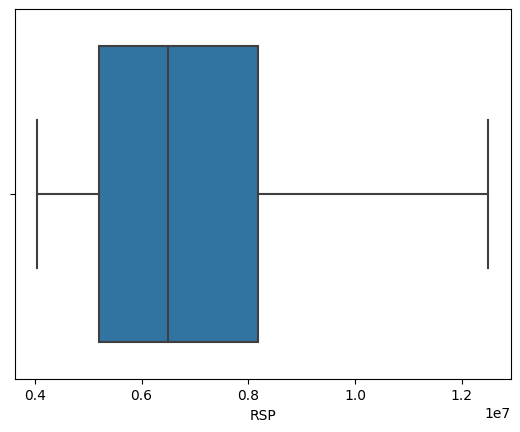

In [79]:
dsnr.info()
sns.boxplot(data=dsnr, x='RSP')

Al filtrar los campos de precio, encontramos que tenemos 4906 registros que cumplen con las condiciones adecuadas para el estudio, y la distribucion se ve mas normal que antes, sin datos atipicos.

A continuacion, para la variable FOB vamos a trabajar con la informacion disponible, teniendo en cuenta que solo hay datos desde 2021 en adelante.

In [21]:
dsnf = dsnr[(dsnr['FOB'] > 0) & (dsnr['Year'] > 2020)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 12 to 7053
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     1053 non-null   int64         
 1   Retail         1053 non-null   int64         
 2   Exports        1053 non-null   float64       
 3   Date           1053 non-null   datetime64[ns]
 4   Year           1053 non-null   int64         
 5   Month          1053 non-null   int64         
 6   RSP            1053 non-null   int64         
 7   FOB            1053 non-null   float64       
 8   TRM            1053 non-null   float64       
 9   Interest rate  1053 non-null   float64       
 10  Segment code   1053 non-null   int64         
 11  CC             1053 non-null   int64         
 12  Brand code     1053 non-null   int64         
 13  OEM code       1053 non-null   int64         
 14  OEM_CHINA      1053 non-null   uint8         
 15  OEM_INDIA      1053 

<Axes: xlabel='FOB', ylabel='Count'>

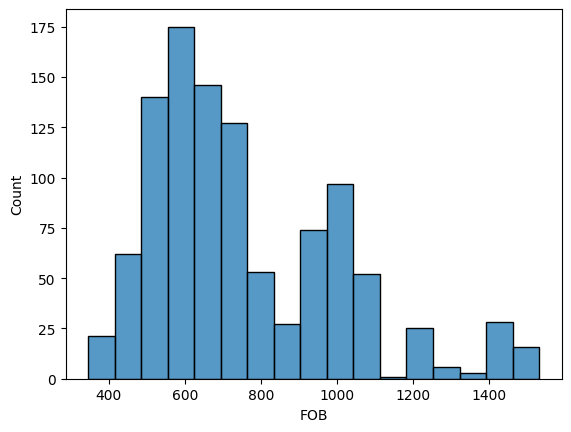

In [22]:
dsnf.info()
sns.histplot(data=dsnf, x='FOB')

<Axes: xlabel='FOB'>

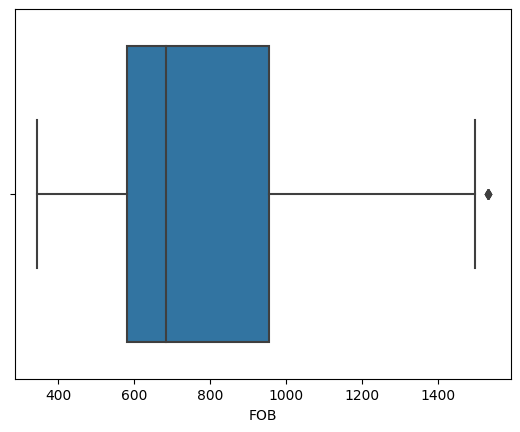

In [23]:
sns.boxplot(data=dsnf, x='FOB')

En este primer ejercicio, al solo quitar los FOB iguales a 0 y -1 pasamos de casi 5mil registros a solo 1053. También se observa en el boxplot que existen algunos datos atipicos con FOB superiores a los 1500 usd, pero en este punto vamos a dejarlos porque también tienen un RSP definido.

Con los datos filtrados, procedemos con algunas medidas estadísticas básicas

In [24]:
#Principales medidas estadisticas
dsnf.describe().T

count          mean           std           min           25%  \
Model code     1053.0  4.692571e+03  1.502147e+03  1.000000e+00  4.925000e+03   
Retail         1053.0  5.322877e+02  5.139641e+02  1.000000e+00  1.960000e+02   
Exports        1053.0  6.360878e+02  1.046664e+03  0.000000e+00  0.000000e+00   
Year           1053.0  2.021884e+03  7.613933e-01  2.021000e+03  2.021000e+03   
Month          1053.0  6.013295e+00  3.322039e+00  1.000000e+00  3.000000e+00   
RSP            1053.0  7.254386e+06  2.033948e+06  4.070000e+06  5.599000e+06   
FOB            1053.0  7.587299e+02  2.521584e+02  3.460000e+02  5.810000e+02   
TRM            1053.0  4.150194e+03  3.970231e+02  3.559460e+03  3.806870e+03   
Interest rate  1053.0  6.834995e-02  4.608988e-02  1.750000e-02  1.750000e-02   
Segment code   1053.0  5.331434e+00  4.343971e+00  1.000000e+00  2.000000e+00   
CC             1053.0  1.355508e+02  3.555853e+01  9.800000e+01  1.090000e+02   
Brand code     1053.0  2.827787e+02  2.151067e+02  3.800000e+01  3.800000e+01   
OEM code       1053.0  1.438746e+00  8.280372e-01  1.000000e+00  1.000000e+00   
OEM_CHINA      1053.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
OEM_INDIA      1053.0  7.806268e-01  4.140186e-01  0.000000e+00  1.000000e+00   
OEM_JAPAN      1053.0  2.193732e-01  4.140186e-01  0.000000e+00  0.000000e+00   
OEM_OTHERS     1053.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                      50%         75%           max  
Model code        5383.00     5838.00  6.143000e+03  
Retail             378.00      645.00  3.260000e+03  
Exports              0.00      960.00  7.650000e+03  
Year              2022.00     2022.00  2.023000e+03  
Month                6.00        9.00  1.200000e+01  
RSP            6899000.00  8490000.00  1.249900e+07  
FOB                683.19      955.00  1.531210e+03  
TRM               3982.60     4532.07  4.819420e+03  
Interest rate        0.06        0.12  1.325000e-01  
Segment code         6.00        7.00  1.600000e+01  
CC                 124.00      159.00  2.490000e+02  
Brand code         218.00      545.00  5.900000e+02  
OEM code             1.00        1.00  3.000000e+00  
OEM_CHINA            0.00        0.00  0.000000e+00  
OEM_INDIA            1.00        1.00  1.000000e+00  
OEM_JAPAN            0.00        0.00  1.000000e+00  
OEM_OTHERS           0.00        0.00  0.000000e+00

A continuacion vamos a realizar analisis de correlacion entre las diferentes columnas de interes para el modelo.

# Analisis de correlacion entre variables del dataset


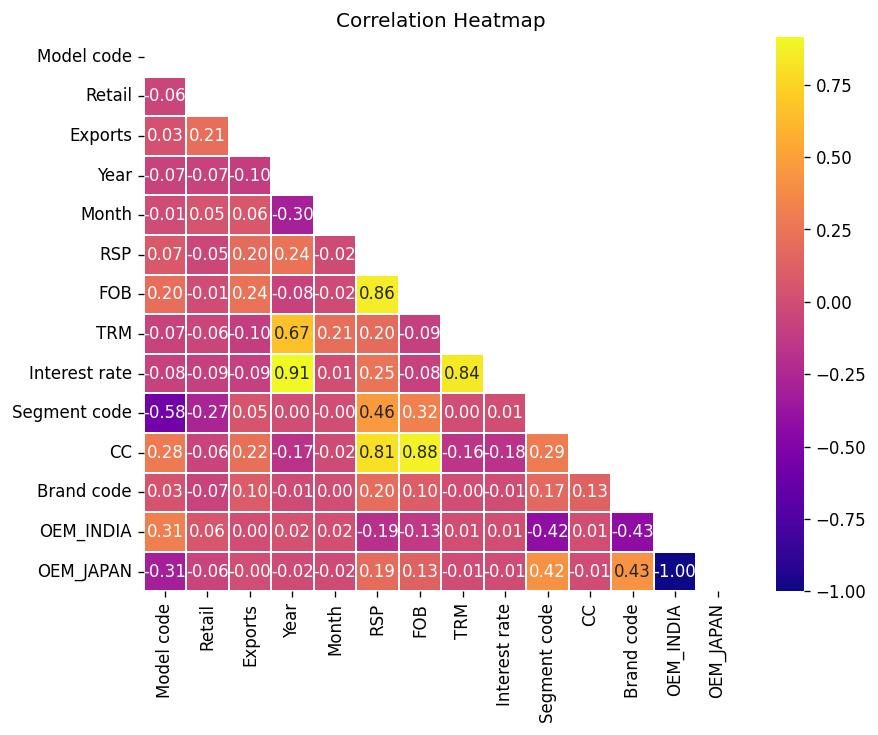

In [25]:
column_to_exclude = {'OEM code','OEM_CHINA','OEM_OTHERS'}

dsnff =dsnf.drop(columns=column_to_exclude)

#Correlaciones
plt.figure(dpi = 120,figsize= (8,6))
mask = np.triu(np.ones_like(dsnff.corr(),dtype = bool))
sns.heatmap(dsnff.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

En la matriz de correlacion se observa lo siguiente:

RSP o precio publico es una variable que tiene correlaciones on todas las demas variables, mientras que las ventas retail solo tienen una baja correlacion con el codigo del segmento, el CC, exportaciones, FOB y el OEM.

Existe una fuerte correlacion entre: Interest rate -año (0.91), FOB-CC (0.88) , RSP-FOB (0.86),  TRM -Interest Rate (0.84),  RSP-CC (0.81) y  TRM-año (0.67)

Existe una baja correlacion entre RSP-Interest rate (0.25), Retail-Export(0.21), Exports-RSP (0.20), Exports -FOB (0.24),  Exports-CC (0.22),  año-RSP (0.24),   year-cc(-0.17),  mes-TRM(0.21),   RSP-TRM (0.20),
  

A continuacion vamos a analizar las variables con alta correlacion de forma grafica

# Precio vs CC

In [26]:
to = ds[['OEM', 'OEM code']]
tabla_oem = to.drop_duplicates(subset=['OEM', 'OEM code'])
print(tabla_oem)

       OEM  OEM code
0   OTHERS         4
12   JAPAN         3
15   CHINA         2
27   INDIA         1


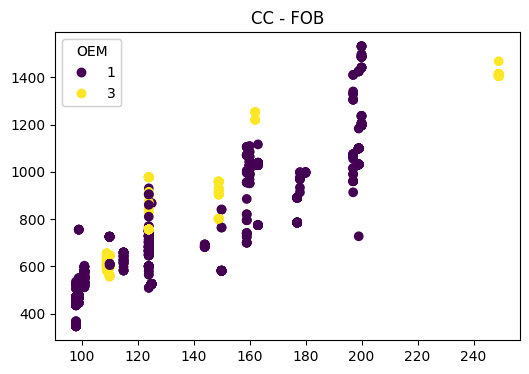

In [27]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.CC, dsnf.FOB, c=dsnf["OEM code"]);
ax.set_title("CC - FOB");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

El FOB de las marcas indias y japonesas esta fuertemente correlacionado con el cilindraje de la moto. En este grafico se observa como las motocicletas de 100cc tienen precios promedio inferiores a 800 dolares, mientras que las motos de 200cc estan por encima de ese valor.

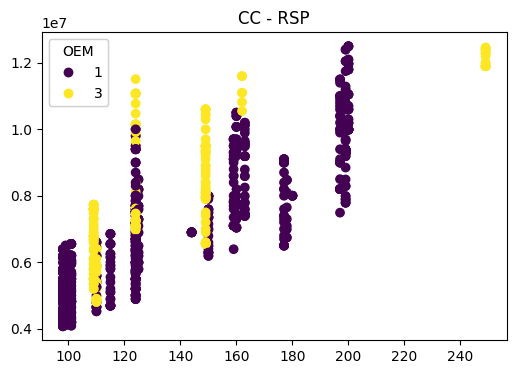

In [38]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.CC, dsnf.RSP, c=dsnf["OEM code"]);
ax.set_title("CC - RSP");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

In [33]:
# Calcular la correlación entre dos columnas
correlation = dsnf['CC'].corr(dsnf['RSP'])

# Mostrar el valor de correlación
print("La correlación entre CC & RSP es:", correlation)

La correlación entre CC & RSP es: 0.8053570572769736


## Correlacion entre precio y CC

De acuerdo a estos dos graficos se observa una fuerte correlacion positiva. Si bien esta métrica no indica causalidad, existe una correlacion positiva fuerte entre el CC y los precios que se puede explicar por la relación entre el costo de producir una motocicleta. Entre más grande tenga su motor, mayor su costo y asi mismo, debe elevarse en relación su precio de venta.

En este grafico se incluye el origen del fabricante, pero parece que no es determinante para estas variables.

De cierta forma, da la impresion de que esta correlacion se da más fuertemente en cilindrajes menores a 120 y mayores a 190 cc.

A continuación se realizará un filtro para evaluar si esta correlacion es igual de fuerte en cilindrajes medios.

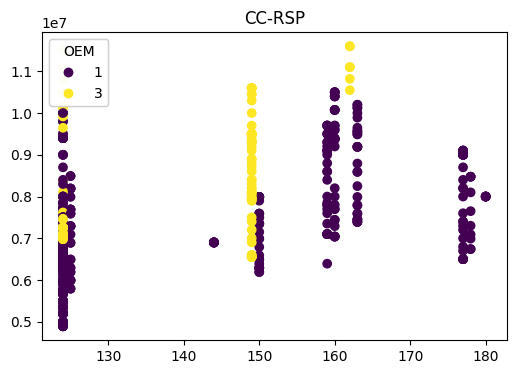

In [34]:
df = dsnf[(dsnf['CC'] > 120) & (dsnf['CC'] < 190)]
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(df.CC, df.RSP, c=df["OEM code"]);
ax.set_title("CC-RSP");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

In [35]:
# Calcular la correlación entre dos columnas
correlation = df['CC'].corr(df['RSP'])

# Mostrar el valor de correlación
print("La correlación entre CC & RSP para CC entre 120 y 190  es:", correlation)

La correlación entre CC & RSP para CC entre 120 y 190  es: 0.39184734317384856


In [40]:
# Calcular la correlación entre dos columnas
correlation = df['RSP'].corr(df['OEM_INDIA'])

# Mostrar el valor de correlación
print("La correlación entre CC & RSP para CC entre 120 y 190  de origen Indio es:", correlation)

La correlación entre CC & RSP para CC entre 120 y 190  es: -0.36769575461543696


In [43]:
# Calcular la correlación entre dos columnas
correlation = df['RSP'].corr(df['OEM_JAPAN'])

# Mostrar el valor de correlación
print("La correlación entre CC & RSP para CC entre 120 y 190 de origen Japones es:", correlation)

La correlación entre CC & RSP para CC entre 120 y 190  es: 0.36769575461543696


In [45]:
# Calcular la correlación entre dos columnas
correlation = dsnr['RSP'].corr(dsnr['OEM_CHINA'])

# Mostrar el valor de correlación
print("La correlación entre CC & RSP para CC entre 120 y 190 de origen Chino es:", correlation)

La correlación entre CC & RSP para CC entre 120 y 190  es: -0.18202273206500705


Al quitar los cilindrajes más pequeños y los más grandes, la correlacion entre estas dos variables baja considerablemente. Esto se puede interpretar como que en este segmento del mercado, los precios no dependen tanto del tamaño del motor sino de otros factores.

Por otra parte, cuando comparamos el precio con el origen del fabricante, encontramos dos correlacione bajas pero interesantes. El precio tiene correlacion positiva con el origen cuando son motos japoensas, y negativo cuando son motos indias. Cuando comparamos las motos chinas, también se observa una correlacion debil negtiva frente al precio, menor a la correlacion con las motos Indias y Japonesas. Estimamos que este resultado obtenido se debe a la falta de datos de precios para motocicletas chinas.

# RSP vs FOB

Continuando con las variables que presentan una fuerte correlación, pasamos a analizar los precios público y de exportación

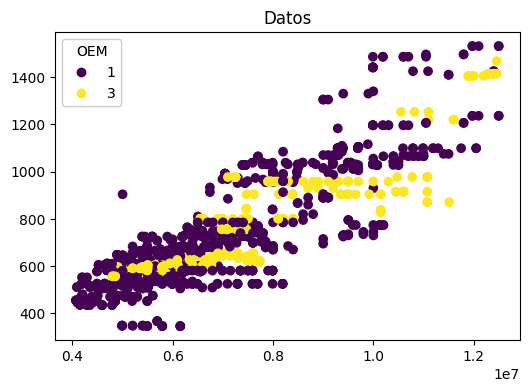

In [46]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.RSP, dsnf.FOB, c=dsnf["OEM code"]);
ax.set_title("Datos");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

En el grafico se observa como estas dos variables estan fuertemente correlacionadas.

 El FOB determina parte del costo de los fabricantes, mientras que el RSP es clave para la ganancia de esos mismos productos. La relación entre ambos (RSP/FOB) se conoce en el mundo de las motos como el 'factor', y es un aspecto clave para la negociacion entre proveedores y comerciantes.

En este grafico tambien se incluye el origen del fabricante, pero no parece ser determinante para la correlacion.

Esta relacion entre RSP y FOB es importante porque determina la competitividad de los productores.

## Correlaciones entre precios

En este punto es claro que la variable RSP se relaciona fuertemente con las otras variables en el dataset. Más adelante se revisarán estás relaciones para crear modelos de regresión, que permitan predecir el precio público de un nuevo modelo, usando las otras variables estimadas.

#Tasa de interes y TRM vs Year

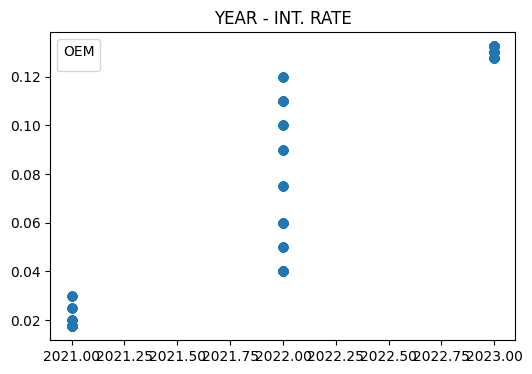

In [47]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.Year,dsnf['Interest rate']);
ax.set_title("YEAR - INT. RATE");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")

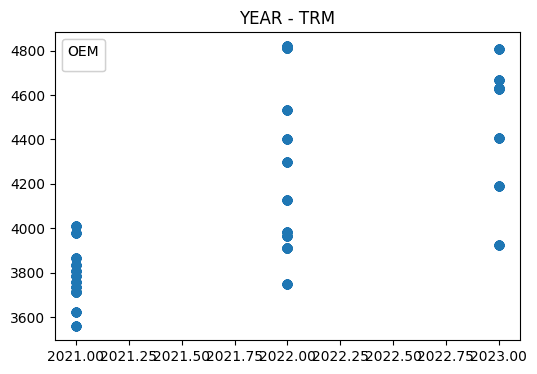

In [48]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.Year,dsnf.TRM);
ax.set_title("YEAR - TRM");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

Para analizar este grafico hay que entender lo que se esta midiendo y el contexto de tiempo en el que ocurre.

En el 2022 el gobierno colombiano comienza a subir tasas de interes para combatir la inflación, mientras que en el 2020, por el efecto del COVID y su impacto en la economía, se bajaron las tasas.

Esta correlacion corresponde a factores externos diferentes de las motos, que ha producido que, a medida que pasa el tiempo, sube la TRM y la tasa de interés al mismo tiempo.

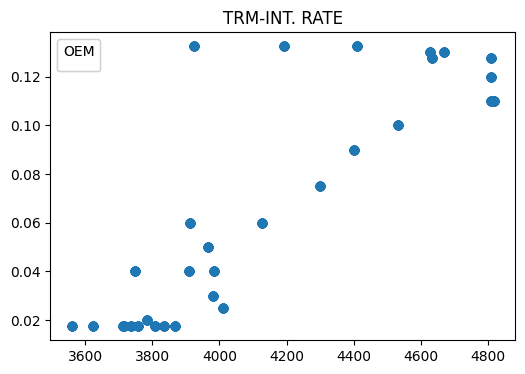

In [49]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.TRM,dsnf['Interest rate']);
ax.set_title("TRM-INT. RATE");

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="OEM")
ax.add_artist(legend1)

Estas dos variables macroeconómicas no estan propiamente relacionadas, pero se observa que tienen una fuerte correlacion positiva en Colombia.

 La interpretacion es similar al grafico anterior, probablemente se debe a factores externos politicos y economicos. En el 2022 se realizaron elecciones, lo que sumado a la subida de tasa representativa genera incertidumbre, migracion de capital por fuera del pais, lo que gener una subida en tasa de cambio.

Estas primeras conclusiones son especulativas. Para tener realmente conclusiones solidas seria necesario contar con mas informacion de la que tenemos disponible en este momento y no es el objetivo del proyecto.

# Variables con baja correlacion

En este momento se van a realizar algunos gráficos que permitan entender las correlaciones bajas que encontramos en la matriz. Se complementará el análisis con otras variables de categoría para buscar algún patrón.

## RSP vs interest rate vs CC

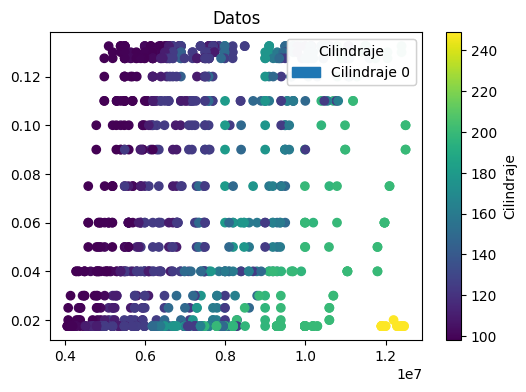

In [69]:
# Visualización
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.RSP, dsnf['Interest rate'],c=dsnf.CC)
ax.set_title("Datos")

# Obtener los valores únicos de la columna 'CC'
unique_cc_values = {0,98,125,150,200,250,300}

# Crear parches de colores para la leyenda
color_patches = [mpatches.Patch(color=color, label=f'Cilindraje {cc}') for color, cc in zip(scatter.get_facecolor(), unique_cc_values)]

# Agregar la leyenda de parches al costado derecho del gráfico
legend = ax.legend(handles=color_patches, title='Cilindraje', loc='upper right')
ax.add_artist(legend)

# Agregar una barra de color en el costado derecho que identifica los cilindrajes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cilindraje')

ax.set_title("Datos")
plt.show()

Por los colores se observa una correlación entre el cilindraje y el precio, pero las tasas de interés no parecen tener una correlación con precio ni cilindraje.



## Retail vs Exports

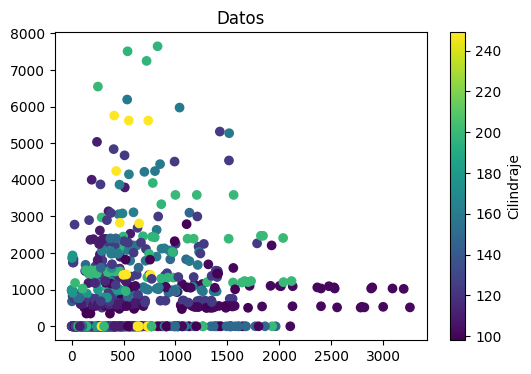

In [72]:
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.Retail, dsnf.Exports,c=dsnf.CC)
ax.set_title("Datos")

# Obtener los valores únicos de la columna 'CC'
unique_cc_values = {0,98,125,150,200,250,300}

# Crear parches de colores para la leyenda
color_patches = [mpatches.Patch(color=color, label=f'Cilindraje {cc}') for color, cc in zip(scatter.get_facecolor(), unique_cc_values)]

# Agregar una barra de color en el costado derecho que identifica los cilindrajes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cilindraje')

ax.set_title("Datos")
plt.show()

En una primera instancia parece no existir una correlación entre las exportaciones y las ventas retail. Hay que tener en cuenta que los datos no están agregados, sino que aparece el detalle x modelo mes a mes y no todos los meses se realizan exportaciones de motos a diferencia de las ventas retail que si son todos los meses. Para analizar mejor está relación se usaran datos agregados más adelante

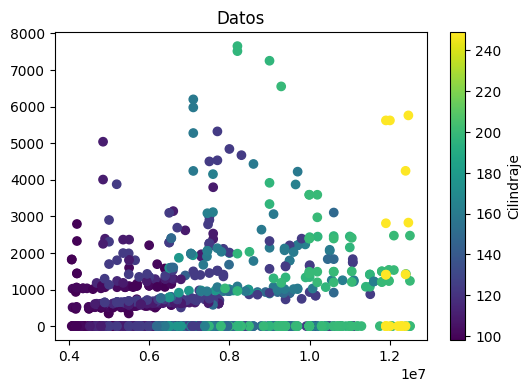

In [71]:
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnf.RSP, dsnf.Exports,c=dsnf.CC)
ax.set_title("Datos")

# Obtener los valores únicos de la columna 'CC'
unique_cc_values = {0,98,125,150,200,250,300}

# Crear parches de colores para la leyenda
color_patches = [mpatches.Patch(color=color, label=f'Cilindraje {cc}') for color, cc in zip(scatter.get_facecolor(), unique_cc_values)]

# Agregar una barra de color en el costado derecho que identifica los cilindrajes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cilindraje')

ax.set_title("Datos")
plt.show()

Nuevamente, al analizar las exportaciones mes a mes se observa que hay una gran cantidad de meses en los que no se exportan ciertos modelos, por eso se ve una gran concentración de datos en 0.

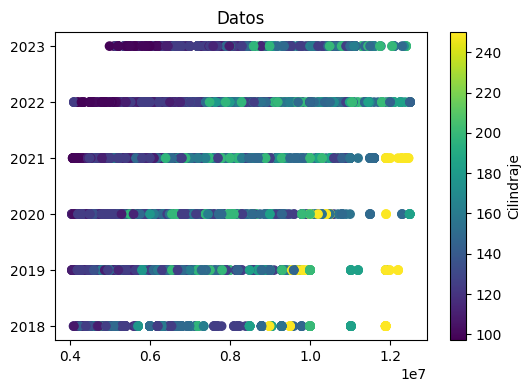

In [75]:
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnr.RSP, dsnr.Year,c=dsnr.CC)
ax.set_title("Datos")


# Obtener los valores únicos de la columna 'CC'
unique_cc_values = {0,98,125,150,200,250,300}

# Crear parches de colores para la leyenda
color_patches = [mpatches.Patch(color=color, label=f'Cilindraje {cc}') for color, cc in zip(scatter.get_facecolor(), unique_cc_values)]

# Agregar una barra de color en el costado derecho que identifica los cilindrajes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cilindraje')

ax.set_title("Datos")
plt.show()

En este grafico se puede observar como los precios de las motos aumentan en el tiempo. en 2018 el rango de precios se movia entre 4 millones y los 10, mientras que en el 2023 oscila entre los 6 y los 12 millones. un incremento del 20% si comparamos los precios en el límite superior

Este grafico tambien respalda la neecesidad de recolectar mas informacion. En el año 2023 practicamente no se miden modelos de mas de 240 cc

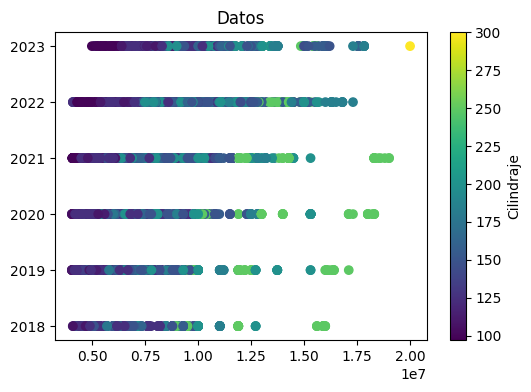

In [82]:
dsnr2 = dsn[(dsn['RSP'] > 4000000) & (dsn['RSP'] < 20000000)]
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(dsnr2.RSP, dsnr2.Year,c=dsnr2.CC)
ax.set_title("Datos")


# Obtener los valores únicos de la columna 'CC'
unique_cc_values = {0,98,125,150,200,250,300}

# Crear parches de colores para la leyenda
color_patches = [mpatches.Patch(color=color, label=f'Cilindraje {cc}') for color, cc in zip(scatter.get_facecolor(), unique_cc_values)]

# Agregar una barra de color en el costado derecho que identifica los cilindrajes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cilindraje')

ax.set_title("Datos")
plt.show()


Este grafico se observan los datos faltantes mencionados.

El precio es una variable de interés para este estudio, y en los gráficos anteriores se pudieron encomtrar algunas correlaciones interesantes. Ahora vamos a realizar un analisis de la columna 'retail' otra variable muy importante para los inversionistas (la principal).

# Analisis de la variable Retail

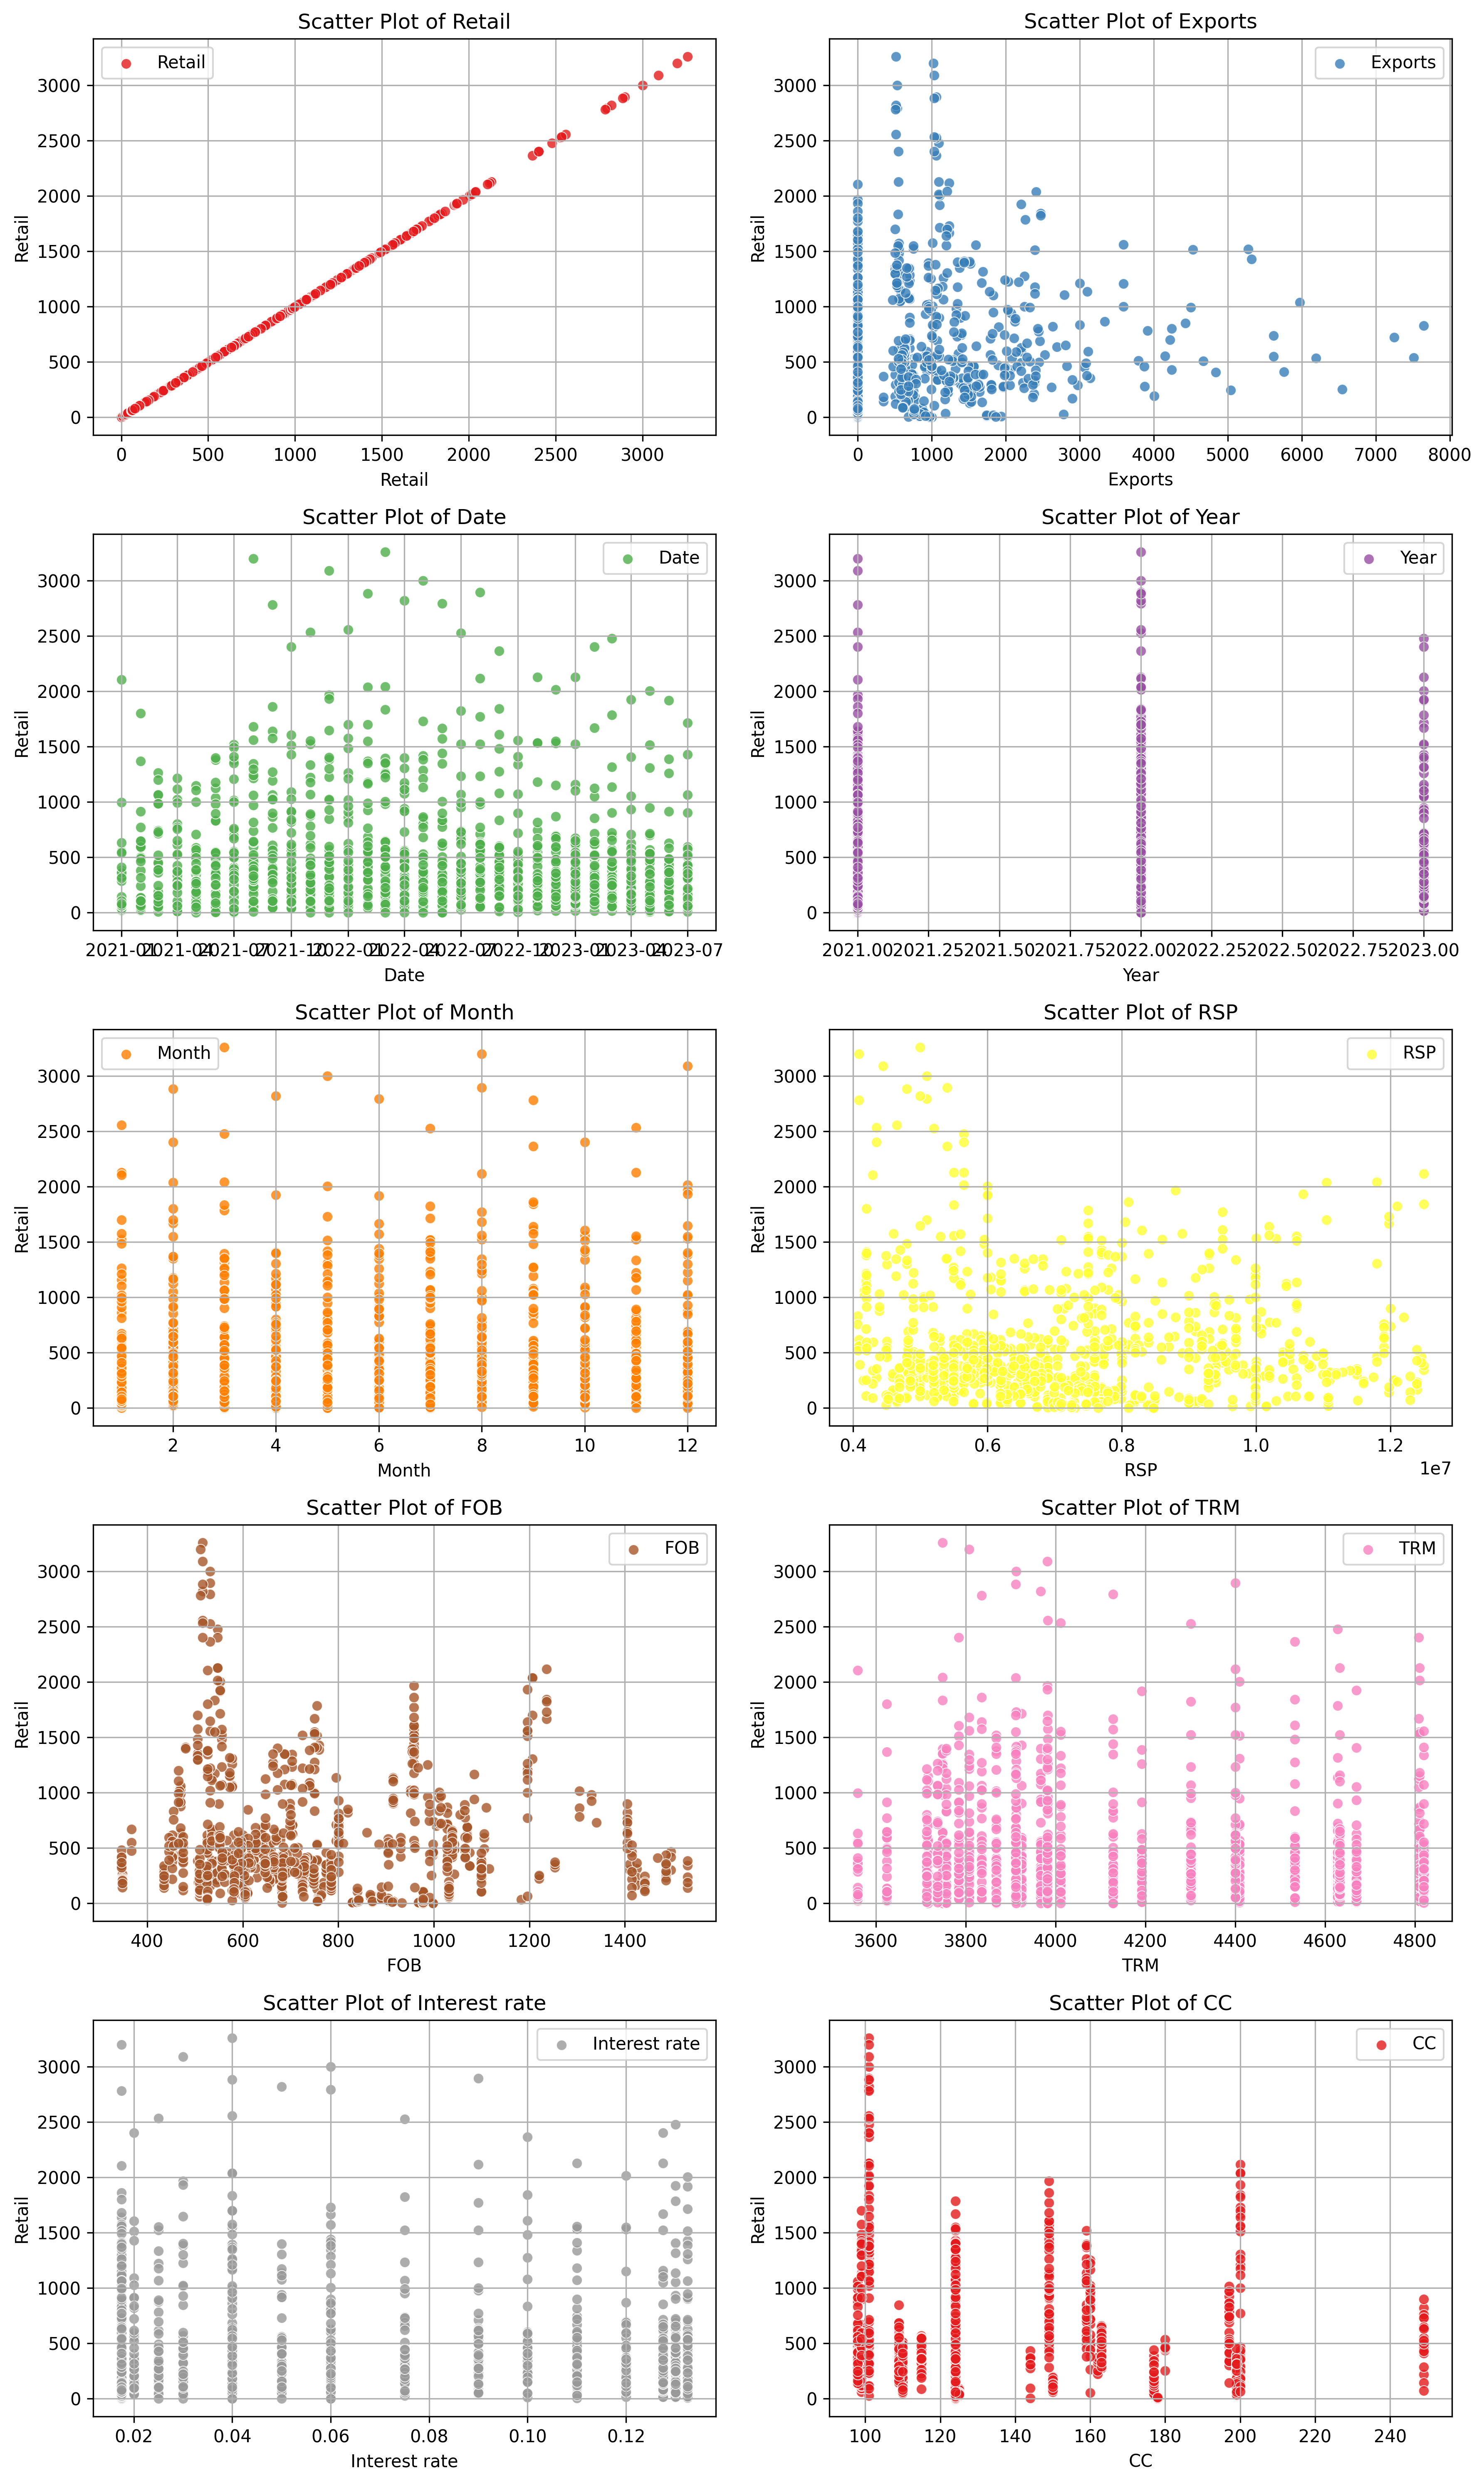

In [83]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 20), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.scatterplot(data=dsnf, x=column, y='Retail', ax=axes[row, col], color=colors[i], alpha=0.8, label=column)
    axes[row, col].set_ylabel('Retail', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Scatter Plot of {column}', color=title_color)

    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    axes[row, col].grid(True)

    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [84]:
# Calcular la correlación entre dos columnas
correlation = dsnf['Retail'].corr(dsnf['Exports'])

# Mostrar el valor de correlación
print("La correlación entre Retail y Export con el dataset por modelo, mes a mes es:", correlation)

La correlación entre Retail y Export con el dataset por modelo, mes a mes es: 0.20741474618228264


En la matriz de correlacion se observa lo siguiente: Las ventas retail tienen una baja correlacion con el codigo del segmento y las exportaciones.

Sobre este campo, hay que tener en cuenta que se comparan las exportaciones de un modelo x mes en particular, contra las ventas de ese modelo en ese mes particular. Si comparamos los totales de ambos campos tal vez cambie la perspectiva

<Axes: xlabel='Exports', ylabel='Retail'>

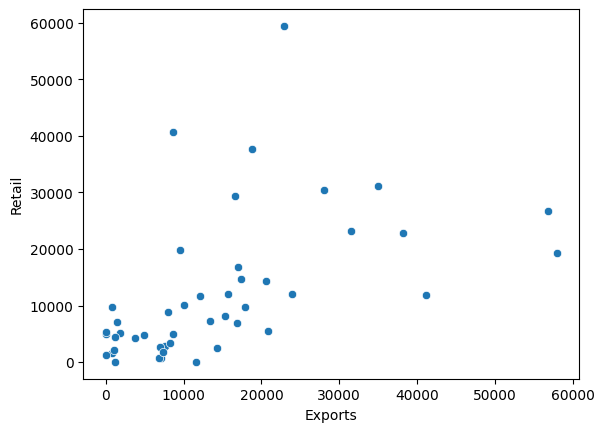

In [85]:
Retail_por_modelo = dsnf.groupby('Model code')['Retail'].sum()
Exports_por_modelo= dsnf.groupby('Model code')['Exports'].sum()

dw = pd.concat([Retail_por_modelo, Exports_por_modelo], axis=1)

sns.scatterplot(data=dsnf, x=Exports_por_modelo, y=Retail_por_modelo)

In [86]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 6143
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Retail   46 non-null     int64  
 1   Exports  46 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Cuando agrupamos los totales por modelo, se observa un cambio en el grafico considerable, los datos pasan a ser 46 registros de modelos con informacion de exportaciones y retail.

In [87]:
# Calcular la correlación entre dos columnas
correlation = dw['Retail'].corr(dw['Exports'])

# Mostrar el valor de correlación
print("La correlación entre Retail y Export con el dataset agrupado por modelo es:", correlation)

La correlación entre Retail y Export con el dataset agrupado por modelo es: 0.519568522469733


Al tomar valores totales, la correlacion sube de 20 a 52%. La explicacion es que para lograr venderle una moto al publico, la debo exportar primero, estan directamente relacionadas.

#Analisis de las variabels contra el tiempo


A ocntinuacion se relaizara una serie de graficos para comparar la evolucion a traves del tiempo

In [88]:
dsnf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 12 to 7053
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     1053 non-null   int64         
 1   Retail         1053 non-null   int64         
 2   Exports        1053 non-null   float64       
 3   Date           1053 non-null   datetime64[ns]
 4   Year           1053 non-null   int64         
 5   Month          1053 non-null   int64         
 6   RSP            1053 non-null   int64         
 7   FOB            1053 non-null   float64       
 8   TRM            1053 non-null   float64       
 9   Interest rate  1053 non-null   float64       
 10  Segment code   1053 non-null   int64         
 11  CC             1053 non-null   int64         
 12  Brand code     1053 non-null   int64         
 13  OEM code       1053 non-null   int64         
 14  OEM_CHINA      1053 non-null   uint8         
 15  OEM_INDIA      1053 

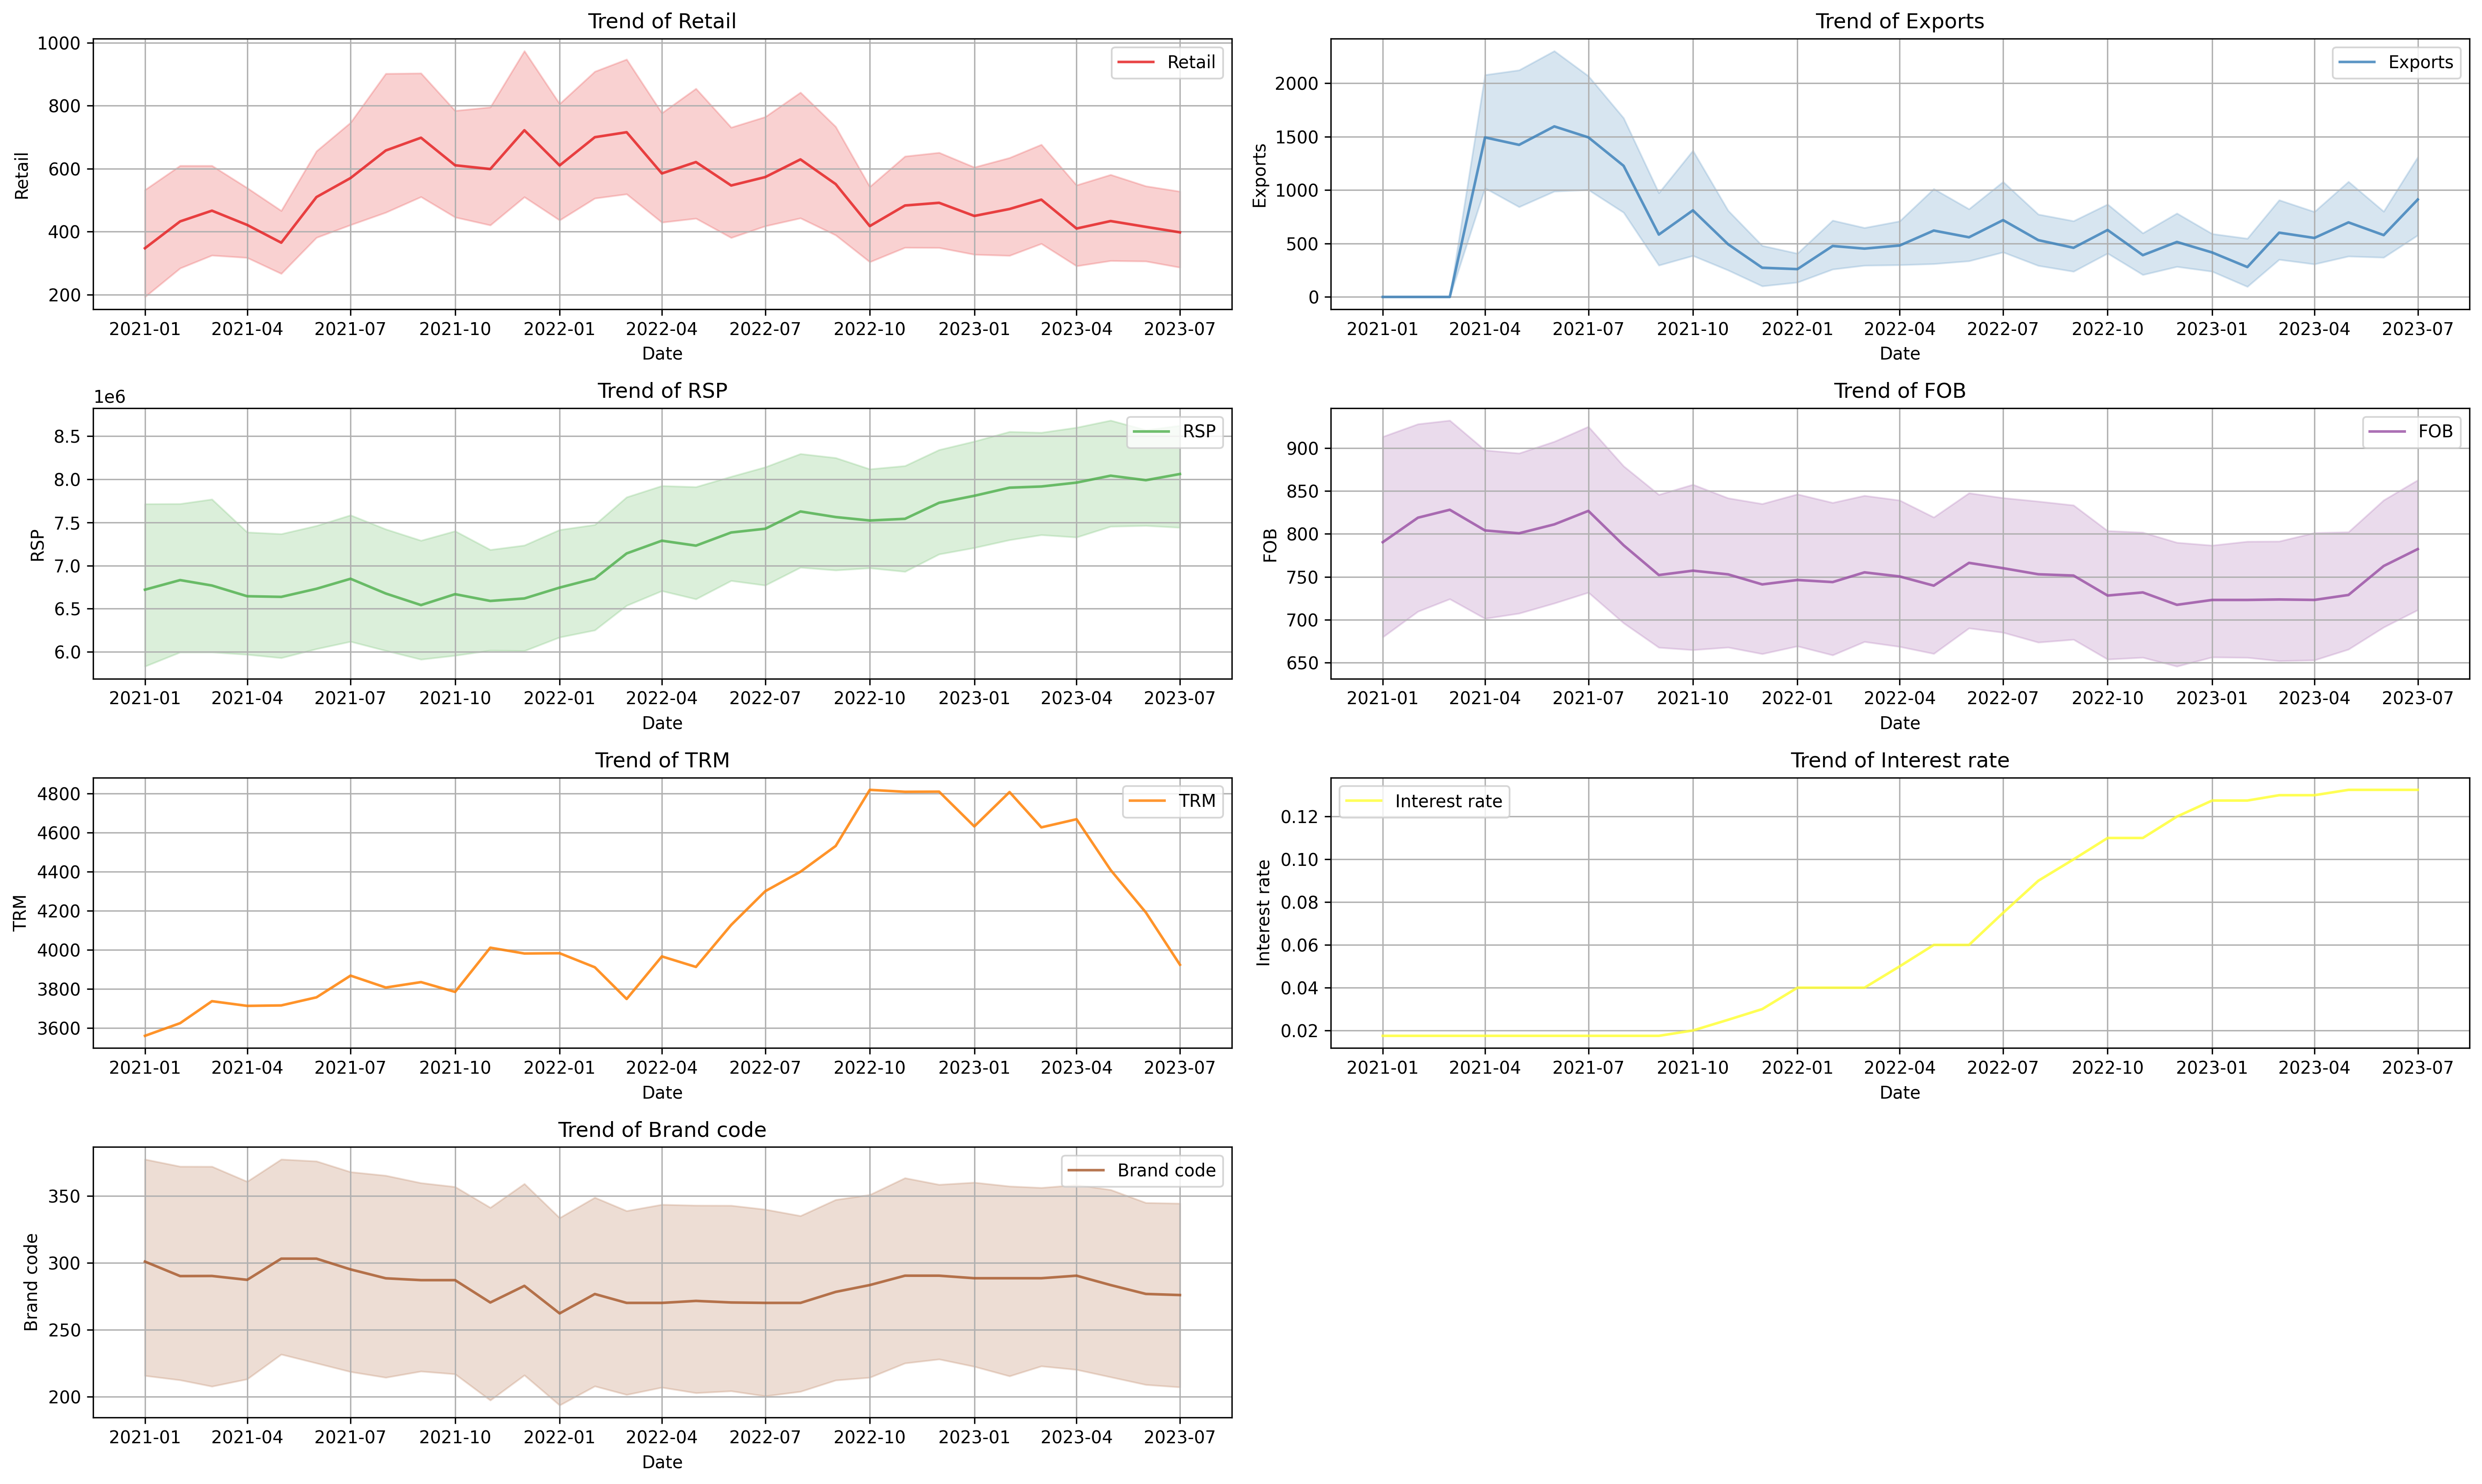

In [89]:
columns_to_exclude = {'Model code','Year','Month','Segment code','OEM code','OEM_CHINA','OEM_INDIA','OEM_JAPAN','OEM_OTHERS','Date','CC'}

all_columns = dsn.columns

columns = all_columns.drop(columns_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 12), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.lineplot(data=dsnf, x='Date', y=column, ax=axes[row, col], color=colors[i], alpha=0.8, label=column)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Trend of {column}', color=title_color)

    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    axes[row, col].grid(True)

    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

En estos graficos se observa la tendencia de las diferentes variables a través del tiempo.

Al comparar el retail con la TRM y las tasas de interes, se observa una relación inversamente proporcional. Esto hace sentido, pues a mayor tasa de cambio, mayor precio de las importaciones (como los combustibles), lo que genera inflación y por ende, mayores costos de vida que afectan la venta de motocicletas nuevas.

 Para interpretar la relacion entre la tasa de interes y las ventas retail, hay que tener en cuenta algo fundamental de la industria, y es que la mayoria de motos se venden a credito. Esta tasa esta directamente relacionada con las tasas de creditos para motos (que por lo general es mayor vs el IBR), por lo que un aumento en la IBR hace que las tasas de los creditos suban, y comprar motocicleta sea más dificil.

A pesar de que el FOB en promedio se mantiene estable, se observa que por el incremento en la tasa de cambio se produce un incremento en los precios publico para compensar el costo de la moto. Recordemos que el FOB esta en USD y el RSP en COP.

Otro aspecto que se puede identificar en estas graficas es que en los ultimos dos años las exportaciones de motos se han reducido considerablemente. Resulta interesante analizar lo que paso entre abril y julio del 2021, donde se produce un pico en las exportaciones

In [90]:
models = ds[['New Model', 'Model code']]

#Filtro para el marco de tiempo de interes
exports_to_analyse = dsnf[(dsnf['Year'] == 2021) & (dsnf['Month'] > 3) & (dsnf['Month'] < 8) & (dsnf['Exports'] > 0)]

# Realizar la agregación
table = exports_to_analyse.groupby('Model code')['Exports'].sum().reset_index()

# Combinar con la información de 'ds' para obtener 'New Model'
result = table.merge(ds[['New Model', 'Model code']], on='Model code', how='left')

# Eliminar duplicados en el DataFrame 'Result'
result = result.drop_duplicates(subset=['Model code'])

result_sorted = result.sort_values(by='Exports', ascending=False)

# Calcular el total de exportaciones para todos los modelos
total_exports = result_sorted['Exports'].sum()

# Calcular el porcentaje para cada modelo y agregarlo como una columna
result_sorted['Percentage'] = (result_sorted['Exports'] / total_exports) * 100

print(result_sorted)

      Model code       Exports             New Model  Percentage
1279        5865  21685.000000        APACHE RTR 160   11.193352
1021        5835  18103.080000        APACHE RTR 200    9.344438
1087        5838  11962.100000      PULSAR 200 NS FI    6.174590
245         4880  11413.000000            GIXXER 250    5.891156
1489        5872  11348.000000              HUNK 160    5.857605
351         4925  11290.000000                  YC-Z    5.827666
284         4924  11240.800000                  FZ25    5.802270
750         5064   8030.000000           STRYKER 125    4.144921
816         5384   7995.000000          SPORT 100 ES    4.126855
0           2126   7716.999886               DIO 110    3.983357
67          2176   7665.000000             NTORQ 125    3.956516
1589        5875   7205.040000                   SZR    3.719094
198         3572   6549.000000                XPULSE    3.380459
415         5013   5871.000000               IGNITOR    3.030490
1443        5869   4917.2

De abril a junio del 2021 se ve como Apache en sus dos versiones ordeno cerca de 40.000 motos, Pulsar200 12 mil motos, Gixxer250 y Hunk160 11 mil motos cada una, sumando el 30% del total de las exportaciones.

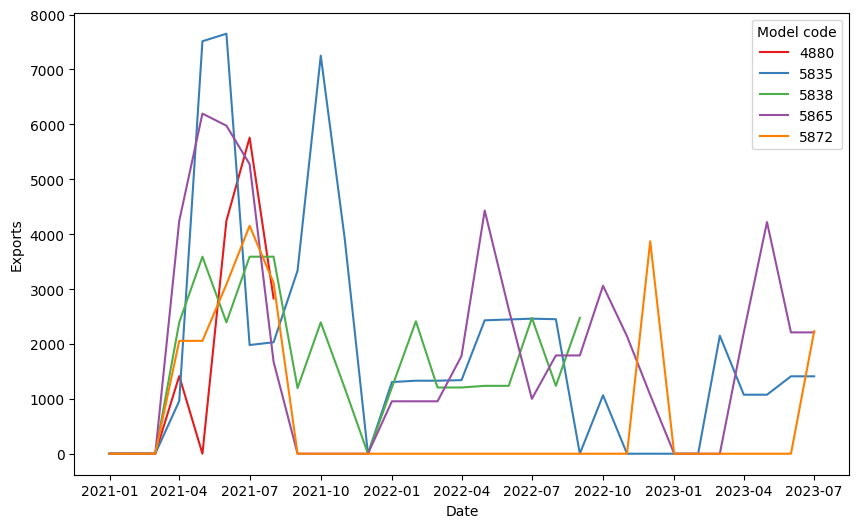

In [91]:
# Códigos de modelo en específico
specific_model_codes = [5865, 5835, 5838, 4880, 5872]

# Crear una máscara de filtrado basada en los códigos de modelo específicos
mask = dsnf['Model code'].isin(specific_model_codes)

# Aplicar la máscara al DataFrame para filtrar
filtered_df = dsnf[mask]

# Especificar una paleta de colores más vivos
color_palette = sns.color_palette("Set1", n_colors=len(specific_model_codes))

# Tamaño del grafico
fig, axes = plt.subplots(figsize=(10, 6), dpi=100)

# Crear el gráfico utilizando la paleta de colores
sns.lineplot(data=filtered_df, x='Date', y='Exports', hue='Model code', palette=color_palette)

# Mostrar el gráfico
plt.show()

Al analizar en detalle estos modelos, se observa que efectivamente, a mediados del 2021 se produjo un gran volumen de exportaciones atípico entre abril y junio del 2021, un periodo que ademas tuvo bajas tasas de cambio y bajas tasas de interes en comparción a los dos años posteriores.

Cabe resaltar que todos estos modelos son de fabricacion India, y que en ese pais el año fiscal comienza en abril. Lo que estamos viendo entonces es producto de una gran negociacion entre productores y comerciantes en Colombia, para arrancar el año fiscal (FY22) con un gran nivel de inventario.

# Modelado


Hasta ahora, con la informacion disponible parece poco probable que se logre generar un modelo efectivo para predecir las ventas retails usando las variables disponibles.

Existen variables adicionales que no se tienen en cuenta para este estudio, como la red de distribucion y cantidad de vendedores por marca, que pueden estar fuertemente relacionados a la variable en cuestion.

El precio publico, por otra parte, parece tener fuertes correlaciones con las otras variables disponibles.

Para el objetivo de un próximo proyecto, se recomienda recolectar otros datos adicionales que permitan pronosticar las ventas. Por ahora nos vamos a enfocar en la prediccion de los precios.

In [92]:
dsnf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 12 to 7053
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Model code     1053 non-null   int64         
 1   Retail         1053 non-null   int64         
 2   Exports        1053 non-null   float64       
 3   Date           1053 non-null   datetime64[ns]
 4   Year           1053 non-null   int64         
 5   Month          1053 non-null   int64         
 6   RSP            1053 non-null   int64         
 7   FOB            1053 non-null   float64       
 8   TRM            1053 non-null   float64       
 9   Interest rate  1053 non-null   float64       
 10  Segment code   1053 non-null   int64         
 11  CC             1053 non-null   int64         
 12  Brand code     1053 non-null   int64         
 13  OEM code       1053 non-null   int64         
 14  OEM_CHINA      1053 non-null   uint8         
 15  OEM_INDIA      1053 

# Primer modelo

El primer modelo se realizará con todas las variables que tiene algún tipo de correlación con el RSP, según la matriz anterior.

In [93]:
# 1 )Preparación de datos
X = dsnf[['Retail','Exports','FOB','TRM','Interest rate','CC','OEM_INDIA','OEM_JAPAN']]
y = dsnf['RSP']


# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
regressor.intercept_

-256490.64701209497

In [95]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Retail         1.164419e+02
Exports        3.251592e+01
FOB            3.776016e+03
TRM            1.046698e+01
Interest rate  1.682517e+07
CC             2.632229e+04
OEM_INDIA     -3.446726e+05
OEM_JAPAN      3.446726e+05

In [96]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [97]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df.describe()

Actual     Predicted         Sesgo  Error_porc
count  2.110000e+02  2.110000e+02  2.110000e+02  211.000000
mean   7.179249e+06  7.203012e+06 -2.376309e+04   -0.964667
std    2.055079e+06  2.003670e+06  6.956883e+05    9.209310
min    4.090000e+06  4.064770e+06 -2.227607e+06  -27.848564
25%    5.624000e+06  5.707886e+06 -4.299288e+05   -6.736733
50%    6.799000e+06  6.897935e+06 -1.146565e+05   -1.603181
75%    7.999500e+06  8.140915e+06  2.585717e+05    4.183114
max    1.249900e+07  1.275549e+07  2.604104e+06   30.170083

In [98]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 508270.14766568266
Mean Squared Error: 482253156902.9058
Root Mean Squared Error: 694444.4951923125


In [99]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.885268938295576


In [ ]:
# R Cuadrado ajustado
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8896262884206309

El primer modelo parece ser muy bueno en explicar la variabilidad del precio, con un r^2 de 0.88 y un MAE de 500 mil pesos.

El alto valor r2 del modelo también puede ser porque usamos casi todas las variables disponibles, pero de acuerdo al r ajustado, el modelo sigue teniendo una buena predicción y no por la cantidad de variables usadas.

De acuerdo al dataset con los errores de predicción, el error más alto que se presentó fue del 30% por encima y -27% en el limite inferior

Hay que tener en cuenta que para predecir el precio público usando este primer modelo debemos conocer de antemano el FOB de la moto, el volumen de exportación, el cilindraje y el origen del productor, lo cual es posible y se puede obtener de las bdd disponibles. Sin embargo, para modelos nuevos tendríamos que estimsr el volumen de venta retail, la TRM y la tasa representativa de cambio. Estos supuestos le agregan incertidumbre al modelo.


Vamos a explorar con otras variables para ver si logramos tener otro modelo, más sencillo con buenos niveles de confianza.

# Segundo modelo

A continuacion vamos a realizar un modelo de regresion multiple, con las variables que tienen mayor correlacion con el precio.

In [100]:
# 1 )Preparación de datos
X = dsnf[['Exports','FOB','Interest rate','CC']]
y = dsnf['RSP']


# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
regressor.intercept_

-216156.99360573012

In [102]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Exports        2.773142e+01
FOB            4.612827e+03
Interest rate  1.650751e+07
CC             2.090343e+04

In [103]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [104]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df.describe()

Actual     Predicted         Sesgo  Error_porc
count  2.110000e+02  2.110000e+02  2.110000e+02  211.000000
mean   7.179249e+06  7.222919e+06 -4.367039e+04   -1.305714
std    2.055079e+06  2.012358e+06  7.369035e+05    9.720347
min    4.090000e+06  4.194872e+06 -2.348999e+06  -29.366158
25%    5.624000e+06  5.758365e+06 -5.036269e+05   -7.976073
50%    6.799000e+06  6.909134e+06 -8.664993e+04   -1.336420
75%    7.999500e+06  8.230529e+06  3.150937e+05    4.351262
max    1.249900e+07  1.270415e+07  2.904960e+06   28.255905

In [105]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 550689.9249088288
Mean Squared Error: 542360319241.4267
Root Mean Squared Error: 736451.1655510002


In [106]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.8709690660139164


In [107]:
# R Cuadrado ajustado
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8726528839260934

Con una reducción de variables como retail, TRM y el origen seguimos teniendo un modelo con un alto nivel de r^2 = 0.87, que cubre buena parte de la variabilidad del RSP y se obtiene un MAE de 550 mil pesos.

De acuerdo al dataset con las predicciones, el error promedio en la predicción del precio es de -1.3%, y el máximo error encontrado es de 28%.

La ventaja de este segundo modelo es que podemos conocer de antemano las variables que lo componen. Esta es una gran ventaja, pero tiene un problema, y es que el cilindraje y el FOB estan altamente correlacionados.

Esto estaria incumpliendo el supesto de independencia de variables predictoras, lo que nos puede llevar a cuestionar estos dos modelos.

# Tercer modelo

Se realizará un tercer modelo que tenga en cuenta variables predictoras que no esten altamente correlacionadas entre si, pero que si tengan correlacion con RSP.

Entre ellas tenemos el FOB, Interest Rate, Segment code y Brand code.

Descartamos Exports porque esta mas correlacionada con el FOB que con el RSP, o lo origenes que tienes mayor correlacion con el segment y el brand que el rsp

In [125]:
# 1 )Preparación de datos
X = dsnf[['FOB','Interest rate','Segment code','Brand code']]
y = dsnf['RSP']


# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
regressor.intercept_

537578.7826133473

In [127]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
FOB            6.667398e+03
Interest rate  1.449012e+07
Segment code   8.414917e+04
Brand code     8.288950e+02

In [128]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [129]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

Actual     Predicted         Sesgo  Error_porc
2650  9499999  8.098914e+06  1.401085e+06   14.748262
643   6699000  7.197214e+06 -4.982145e+05   -7.437147
6348  4999000  5.178282e+06 -1.792821e+05   -3.586360
7053  4800000  5.162243e+06 -3.622432e+05   -7.546733
394   6699000  7.197214e+06 -4.982145e+05   -7.437147
...       ...           ...           ...         ...
2849  7467000  9.171657e+06 -1.704657e+06  -22.829212
6497  7950000  8.172467e+06 -2.224666e+05   -2.798323
3577  4849000  4.540597e+06  3.084028e+05    6.360132
2293  7000000  7.696583e+06 -6.965832e+05   -9.951189
5159  7790000  8.397510e+06 -6.075096e+05   -7.798582

[211 rows x 4 columns]

In [131]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 546502.6275647394
Mean Squared Error: 511528903816.8625
Root Mean Squared Error: 715212.4885772497


In [132]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.878304053820378


In [133]:
# R Cuadrado ajustado
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8836842314087926

Este tercer modelo obtuvo un r^2 de 0.88, cubriendo gran variabilidad del RSP, y un MAE de 550mil pesos, cercano al modelo 2 con variables que no estan fuertemente correlacionadas entre si.

#Conclusiones

De acuerdo a este ejercicio, el modelo que recomendaría para realizar la predicción de la variable RSP es el tercer modelo. Las variables que requiere se pueden obtener fácilmente, a diferencia del primer modelo, en donde necesitamos realizar estimaciones adicionales, y sus variables predictivas no estan fuertemente correlacionadas.


RSP = 8.414917e+04 (Segment code) + 6.667398e+03 (FOB) + 1.449012e+07 (Interest rate) + 8.288950e+02 (Brand code)

In [144]:
# Prueba con Apache 160R

FOB = 1105
Interest_rate = 0.1325
Segment_code = 6
Brand_code = 545

RSP = 6667.39837208657*FOB + 14490121.4095659*Interest_rate + 84149.1726206232*Segment_code + 828.895011853426*Brand_code + 537578.7826133473

rsp = int(RSP)

print('El RSP estimado de esta moto es: $', rsp)



El RSP estimado de esta moto es: $ 10781637


EL paso siguiente consiste en evaluar este modelo con datos del mundo real, tratando de predecir precios de motos en el futuro.